### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing the Dataset

In [2]:
df = pd.read_csv('grades.csv')
df.head()

,days studied,grades
0,1,1.5
1,5,2.7
2,7,3.1
3,3,2.1
4,2,1.8


In [3]:
df.columns

Index(['days studied', 'grades'], dtype='object')

In [4]:
df.describe()

,days studied,grades
count,50.000000,50.000000
mean,7.120000,3.222000
std,4.048885,1.104774
min,1.000000,1.500000
25%,4.000000,2.400000
50%,7.000000,3.100000
75%,10.000000,4.100000
max,14.000000,5.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   days studied  50 non-null     int64  
 1   grades        50 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 928.0 bytes


### Splitting the Data set

In [7]:
X = df['days studied']
y = df['grades']

In [8]:
X.head()

0    1
1    5
2    7
3    3
4    2
Name: days studied, dtype: int64

In [9]:
y.head()

0    1.5
1    2.7
2    3.1
3    2.1
4    1.8
Name: grades, dtype: float64

In [10]:
import sklearn
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,y_train, y_test = train_test_split(X, y, train_size = 0.70, random_state=100)

In [14]:
X_train.shape, X_test.shape, y_train.shape , y_test.shape

((35,), (15,), (35,), (15,))

### Training the Model

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lr = LinearRegression()

In [20]:
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

In [21]:
lr.fit(X_train,y_train)

LinearRegression()

In [22]:
lr.coef_

array([0.27129026])

In [23]:
lr.intercept_

1.2826640847941309

### Predicting the Test set Results

In [24]:
y_pred = lr.predict(X_test)

In [25]:
y_pred

array([2.91040563, 2.09653486, 2.36782511, 2.09653486, 3.99556665,
       1.8252446 , 3.7242764 , 3.45298614, 5.08072768, 3.7242764 ,
       1.55395434, 3.45298614, 1.55395434, 4.53814717, 2.63911537])

In [26]:
y_test

6     2.9
36    2.1
37    2.4
28    2.1
43    4.1
49    1.8
5     3.9
33    3.5
20    5.0
42    3.9
0     1.5
11    3.5
18    1.5
45    4.5
38    2.7
Name: grades, dtype: float64

In [28]:
df = pd.DataFrame()
df['y_actual']= y_test
df['y_pred']= y_pred
df.head()

,y_actual,y_pred
6,2.9,2.910406
36,2.1,2.096535
37,2.4,2.367825
28,2.1,2.096535
43,4.1,3.995567


In [30]:
y_train_pred = lr.predict(X_train)
y_train_pred

array([3.45298614, 1.55395434, 1.8252446 , 4.53814717, 4.53814717,
       5.08072768, 5.08072768, 3.18169588, 2.36782511, 3.99556665,
       3.7242764 , 2.63911537, 1.8252446 , 4.80943742, 1.8252446 ,
       3.18169588, 4.26685691, 3.18169588, 1.8252446 , 2.91040563,
       4.26685691, 3.45298614, 4.80943742, 5.08072768, 3.45298614,
       3.18169588, 1.55395434, 3.45298614, 2.36782511, 3.99556665,
       2.36782511, 2.91040563, 2.09653486, 2.63911537, 4.26685691])

### Visualizing The Results

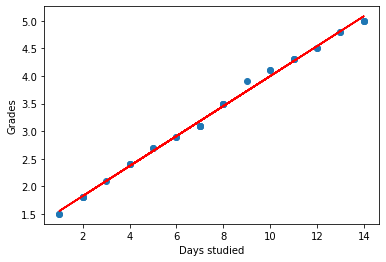

In [35]:
## Training Data

plt.scatter(X_train,y_train)
plt.plot(X_train,y_train_pred,color ='r')
plt.xlabel('Days studied')
plt.ylabel('Grades')
plt.show()

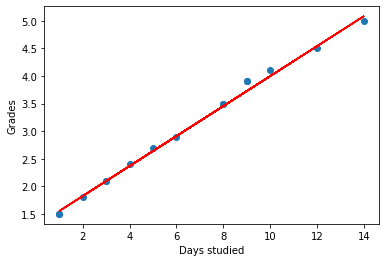

In [36]:
### Test Set

plt.scatter(X_test,y_test)
plt.plot(X_train,y_train_pred,color ='r')
plt.xlabel('Days studied')
plt.ylabel('Grades')
plt.show()

### Checking R2 Values

In [38]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [40]:
print(r2_score(y_true = y_train, y_pred = y_train_pred))
print(r2_score(y_true = y_test, y_pred = y_pred))

0.9967804972551999
0.9945199429812374
